<a href="https://colab.research.google.com/github/fridaruh/ML_and_IA_for_Finance/blob/master/agentchat_groupchat_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Chat with Coder and Visualization Critic

AutoGen offers conversable agents powered by LLM, tool or human, which can be used to perform tasks collectively via automated chat. This framework allows tool use and human participation through multi-agent conversation.
Please find documentation about this feature [here](https://microsoft.github.io/autogen/docs/Use-Cases/agent_chat).

````{=mdx}
:::info Requirements
Install `pyautogen`:
```bash
pip install pyautogen
```

For more information, please refer to the [installation guide](/docs/installation/).
:::
````

In [1]:
!pip install pyautogen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.3 MB/s eta 0:00:00


## Set your API Endpoint

The [`config_list_from_json`](https://microsoft.github.io/autogen/docs/reference/oai/openai_utils#config_list_from_json) function loads a list of configurations from an environment variable or a json file.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import Image

import autogen

config_list_gpt4 = autogen.config_list_from_json(
    "OAI_CONFIG_LIST.txt",
    filter_dict={
        "model": ["gpt-4", "gpt-4-0314", "gpt4", "gpt-4-32k", "gpt-4-32k-0314", "gpt-4-32k-v0314"],
    },
)

# Construct Agents

In [4]:
llm_config = {"config_list": config_list_gpt4, "cache_seed": 42}
user_proxy = autogen.UserProxyAgent(
    name="User_proxy",
    system_message="A human admin.",
    code_execution_config={
        "last_n_messages": 3,
        "work_dir": "groupchat",
        "use_docker": False,
    },  # Please set use_docker=True if docker is available to run the generated code. Using docker is safer than running the generated code directly.
    human_input_mode="NEVER",
)
coder = autogen.AssistantAgent(
    name="Coder",  # the default assistant agent is capable of solving problems with code
    llm_config=llm_config,
)
critic = autogen.AssistantAgent(
    name="Critic",
    system_message="""Critic. You are a helpful assistant highly skilled in evaluating the quality of a given visualization code by providing a score from 1 (bad) - 10 (good) while providing clear rationale. YOU MUST CONSIDER VISUALIZATION BEST PRACTICES for each evaluation. Specifically, you can carefully evaluate the code across the following dimensions
- bugs (bugs):  are there bugs, logic errors, syntax error or typos? Are there any reasons why the code may fail to compile? How should it be fixed? If ANY bug exists, the bug score MUST be less than 5.
- Data transformation (transformation): Is the data transformed appropriately for the visualization type? E.g., is the dataset appropriated filtered, aggregated, or grouped  if needed? If a date field is used, is the date field first converted to a date object etc?
- Goal compliance (compliance): how well the code meets the specified visualization goals?
- Visualization type (type): CONSIDERING BEST PRACTICES, is the visualization type appropriate for the data and intent? Is there a visualization type that would be more effective in conveying insights? If a different visualization type is more appropriate, the score MUST BE LESS THAN 5.
- Data encoding (encoding): Is the data encoded appropriately for the visualization type?
- aesthetics (aesthetics): Are the aesthetics of the visualization appropriate for the visualization type and the data?

YOU MUST PROVIDE A SCORE for each of the above dimensions.
{bugs: 0, transformation: 0, compliance: 0, type: 0, encoding: 0, aesthetics: 0}
Do not suggest code.
Finally, based on the critique above, suggest a concrete list of actions that the coder should take to improve the code.
""",
    llm_config=llm_config,
)

groupchat = autogen.GroupChat(agents=[user_proxy, coder, critic], messages=[], max_round=20)
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=llm_config)

## Start Chat

In [5]:
user_proxy.initiate_chat(
    manager,
    message="download data from https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv and plot a visualization that tells us about the relationship between weight and horsepower. Save the plot to a file. Print the fields in a dataset before visualizing it.",
)
# type exit to terminate the chat

User_proxy (to chat_manager):

download data from https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv and plot a visualization that tells us about the relationship between weight and horsepower. Save the plot to a file. Print the fields in a dataset before visualizing it.

--------------------------------------------------------------------------------
Coder (to chat_manager):

Alright, first let's download the dataset and then print the fields.

Note: We're going to use the `pandas` library in Python to do this. If you don't have it installed, use the command `!pip install pandas` in your Python environment beforehand. 

Here is the Python script for this step:

```python
# filename: download_and_print_fields.py
import pandas as pd

dataset_url = "https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv"

# Download the dataset
df = pd.read_csv(dataset_url)

# Print the fields in a dataset
print(df.columns.tolist())
```

Run the above Python script (`downloa

ChatResult(chat_id=None, chat_history=[{'content': 'download data from https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv and plot a visualization that tells us about the relationship between weight and horsepower. Save the plot to a file. Print the fields in a dataset before visualizing it.', 'role': 'assistant'}, {'content': 'Alright, first let\'s download the dataset and then print the fields.\n\nNote: We\'re going to use the `pandas` library in Python to do this. If you don\'t have it installed, use the command `!pip install pandas` in your Python environment beforehand. \n\nHere is the Python script for this step:\n\n```python\n# filename: download_and_print_fields.py\nimport pandas as pd\n\ndataset_url = "https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv"\n\n# Download the dataset\ndf = pd.read_csv(dataset_url)\n\n# Print the fields in a dataset\nprint(df.columns.tolist())\n```\n\nRun the above Python script (`download_and_print_fields.py`), and

## Display the saved figure

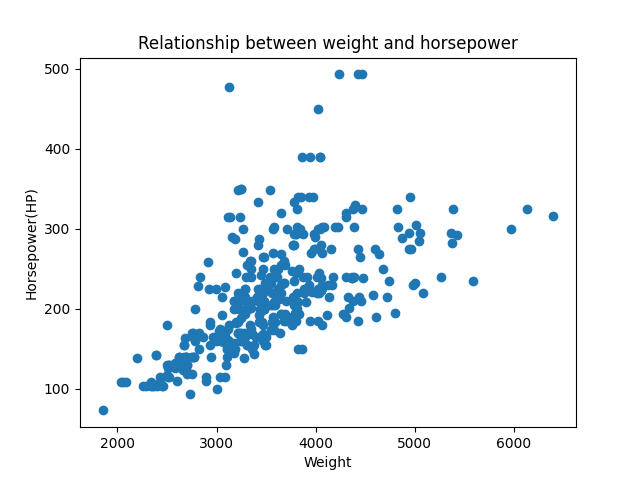

In [8]:
Image(filename="/content/groupchat/weight_horsepower_plot.png")

## Example 2

In [9]:
user_proxy.reset()
coder.reset()
critic.reset()
groupchat = autogen.GroupChat(agents=[user_proxy, coder, critic], messages=[], max_round=20)
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=llm_config)
user_proxy.initiate_chat(
    manager,
    message="download data from https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv and show me a plot that tells me about the amount of each weather . Save the plot to a file. Print the fields in a dataset before visualizing it. Take the feedback from the critic to improve the code.",
)

User_proxy (to chat_manager):

download data from https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv and show me a plot that tells me about the amount of each weather . Save the plot to a file. Print the fields in a dataset before visualizing it. Take the feedback from the critic to improve the code.

--------------------------------------------------------------------------------
Coder (to chat_manager):

Firstly, we will download the dataset, read it with pandas and print the fields in the dataset. 

We will use the `requests` and `pandas` libraries in Python for this. If you don't have these libraries installed already, you can use the following commands to install them:
- `pip install requests pandas`

Please execute the following Python script in a file:

#filename: download_plot_weather.py

```python
import requests
import pandas as pd
import os

# The URL where the data is located
url = "https://raw.githubusercontent.com/vega/vega/main/docs/data/seatt

ChatResult(chat_id=None, chat_history=[{'content': 'download data from https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv and show me a plot that tells me about the amount of each weather . Save the plot to a file. Print the fields in a dataset before visualizing it. Take the feedback from the critic to improve the code.', 'role': 'assistant'}, {'content': 'Firstly, we will download the dataset, read it with pandas and print the fields in the dataset. \n\nWe will use the `requests` and `pandas` libraries in Python for this. If you don\'t have these libraries installed already, you can use the following commands to install them:\n- `pip install requests pandas`\n\nPlease execute the following Python script in a file:\n\n#filename: download_plot_weather.py\n\n```python\nimport requests\nimport pandas as pd\nimport os\n\n# The URL where the data is located\nurl = "https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv"\n\n# Downloading t

### The original chart before critic's suggestion

Fields in the dataset:
Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')
Plot has been saved to 'weather_plot.png'.


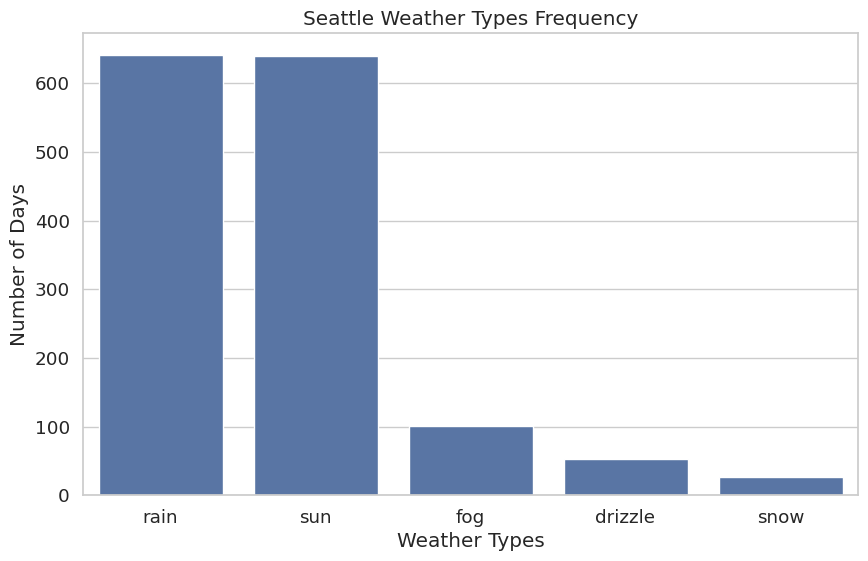

In [10]:
url = "https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv"
data = pd.read_csv(url)
print("Fields in the dataset:")
print(data.columns)

# Count the occurrences of each weather type
weather_counts = data["weather"].value_counts()

# Create a bar plot of weather occurrences
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(10, 6))
weather_plot = sns.barplot(x=weather_counts.index, y=weather_counts.values)

# Add labels and title
weather_plot.set(xlabel="Weather Types", ylabel="Number of Days", title="Seattle Weather Types Frequency")
plt.savefig("weather_plot.png")

print("Plot has been saved to 'weather_plot.png'.")

### The final figure

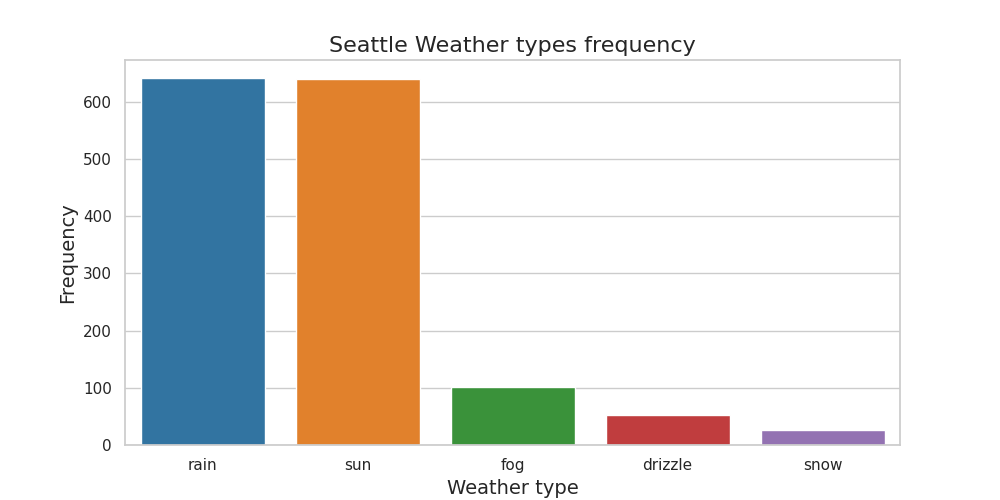

In [11]:
Image(filename="/content/groupchat/weather_plot.png")